In [1]:
%matplotlib inline

In [2]:
import os
from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def getfremont_data(filename='Fremont.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(URL, 'Fremont.csv')
    data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    data.columns = ['West', 'East']
    data['Total'] = data['West'] + data['East']
    return data
        

In [3]:
data = getfremont_data()
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [4]:
data.tail()

,West,East,Total
Date,,,
2017-09-30 19:00:00,16.0,23.0,39.0
2017-09-30 20:00:00,12.0,25.0,37.0
2017-09-30 21:00:00,10.0,29.0,39.0
2017-09-30 22:00:00,5.0,10.0,15.0
2017-09-30 23:00:00,5.0,13.0,18.0


In [5]:
!head Fremont.csv

Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
10/03/2012 12:00:00 AM,4,9
10/03/2012 01:00:00 AM,4,6
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,2,3
10/03/2012 04:00:00 AM,6,1
10/03/2012 05:00:00 AM,21,10
10/03/2012 06:00:00 AM,105,50
10/03/2012 07:00:00 AM,257,95
10/03/2012 08:00:00 AM,291,146


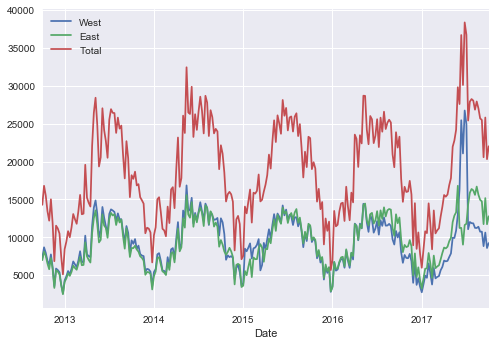

In [6]:
data.resample('W').sum().plot();

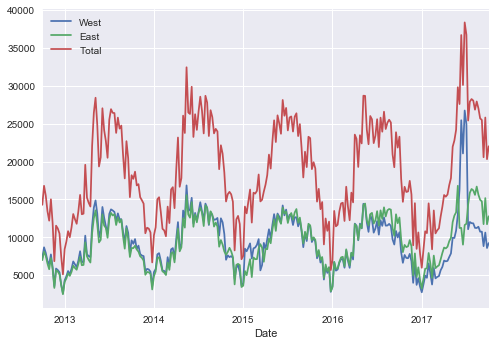

In [7]:
data.resample('W').sum().plot();

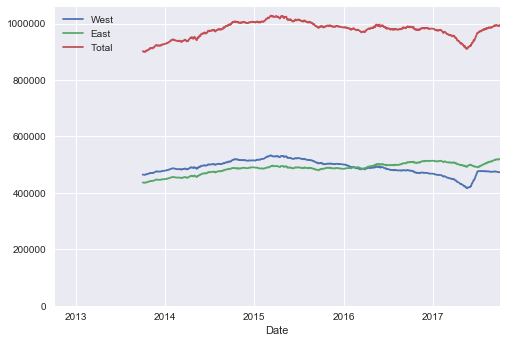

In [8]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

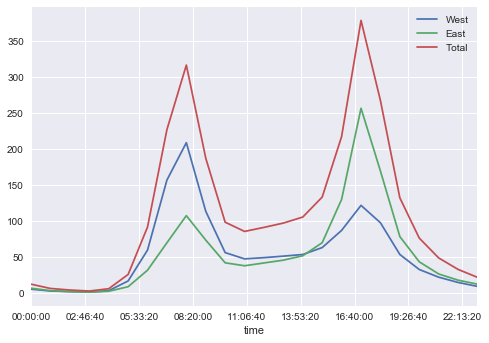

In [9]:
data.groupby(data.index.time).mean().plot();

In [10]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


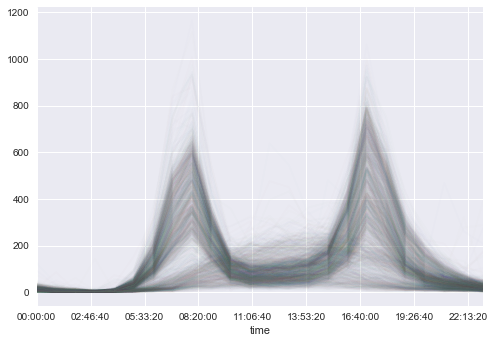

In [17]:
pivoted.plot(legend=False, alpha=0.01);

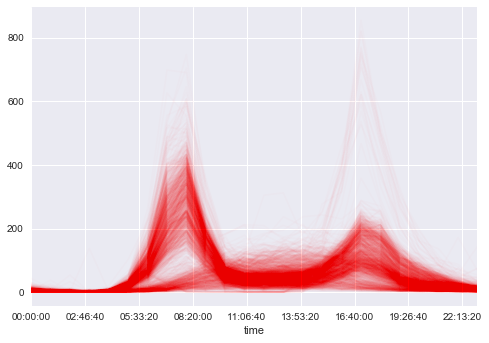

In [12]:
pivotedW = data.pivot_table('West', index=data.index.time, columns=data.index.date)
pivotedW.iloc[:5, :5]
pivotedW.plot(legend=False, alpha=0.01, color=['r']);

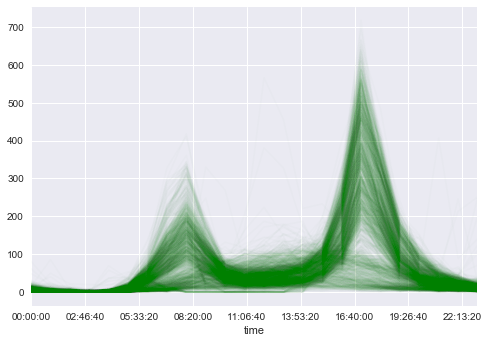

In [13]:
pivotedE = data.pivot_table('East', index=data.index.time, columns=data.index.date)
pivotedE.iloc[:5, :5]
pivotedE.plot(legend=False, alpha=0.01, color=['g']);